In [1]:
import xarray as xr
from glob import glob
import yaml
import os

import plotting

try:
    from ecco_pipeline.conf.global_settings import GRIDS, OUTPUT_DIR
    import ecco_pipeline.transformation.Transformation as Transformation
except:
    os.chdir(os.path.realpath(os.path.join(os.path.abspath(''), '../../..')))
    from ecco_pipeline.conf.global_settings import GRIDS, OUTPUT_DIR
    import ecco_pipeline.transformation.Transformation as Transformation

In [2]:
ds_name = "G10016_V2"
hemisphere = 'nh'
with open(f'conf/ds_configs/{ds_name}.yaml', 'r') as stream:
    config = yaml.load(stream, yaml.Loader)

# Load sample granule

In [3]:
ds_granules_dir = f'{OUTPUT_DIR}/{ds_name}/harvested_granules/'
ds_granules = glob(f'{ds_granules_dir}/**/*.nc')
if hemisphere:
    ds_granules = [g for g in ds_granules if hemisphere in g]
sample_granule_path = ds_granules[0]
print(sample_granule_path)
ds = xr.open_dataset(sample_granule_path)
ds

/Users/marlis/Developer/ECCO/ecco_output/G10016_V2/harvested_granules/2022/seaice_conc_daily_icdr_nh_20220626_f18_v02r00.nc


<xarray.Dataset>
Dimensions:                         (tdim: 1, y: 448, x: 304)
Coordinates:
    time                            (tdim) datetime64[ns] ...
    xgrid                           (x) float32 ...
    ygrid                           (y) float32 ...
Dimensions without coordinates: tdim, y, x
Data variables:
    cdr_seaice_conc                 (tdim, y, x) float32 ...
    melt_onset_day_cdr_seaice_conc  (tdim, y, x) float32 ...
    nsidc_bt_seaice_conc            (tdim, y, x) float32 ...
    nsidc_nt_seaice_conc            (tdim, y, x) float32 ...
    projection                      |S1 ...
    qa_of_cdr_seaice_conc           (tdim, y, x) float32 ...
    spatial_interpolation_flag      (tdim, y, x) float32 ...
    stdev_of_cdr_seaice_conc        (tdim, y, x) float32 ...
    temporal_interpolation_flag     (tdim, y, x) float32 ...
Attributes: (12/40)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc
    ...                        ...
    source:                    Generated from NSIDC0080
    platform:                  DMSP 5D-3/F18 > Defense Meteorological Satelli...
    sensor:                    SSMI/S > Special Sensor Microwave Imager/Sounder
    date_created:              2022-07-02T09:52:21Z
    time_coverage_start:       2022-06-26T00:00:00Z
    time_coverage_end:         2022-06-26T23:59:59Z

# Load grid

In [4]:
grids = glob(f'grids/*.nc*')
grids.sort()
f'Available grids: {grids}'

"Available grids: ['grids/ECCO_llc270.nc', 'grids/ECCO_llc90.nc', 'grids/grid_tpose6_radius.nc', 'grids/polar_stereo_n_25km.nc']"

In [5]:
grid_ds = xr.open_dataset(grids[1])
grid_ds

<xarray.Dataset>
Dimensions:                (tile: 13, j: 90, i: 90)
Coordinates:
  * tile                   (tile) int16 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j                      (j) int16 0 1 2 3 4 5 6 7 ... 82 83 84 85 86 87 88 89
  * i                      (i) int16 0 1 2 3 4 5 6 7 ... 82 83 84 85 86 87 88 89
Data variables:
    XC                     (tile, j, i) float32 ...
    YC                     (tile, j, i) float32 ...
    effective_grid_radius  (tile, j, i) float32 ...
Attributes:
    name:                  ECCO_llc90
    type:                  llc
    geospatial_lat_min:    -89.873055
    geospatial_lat_max:    89.739395
    geospatial_lon_min:    -179.98895
    geospatial_lon_max:    179.98691
    geospatial_lat_units:  degrees_north
    geospatial_lon_units:  degrees_east

In [6]:
T = Transformation.Transformation(config, sample_granule_path)

# Make mapping factors

In [7]:
factors = T.make_factors(grid_ds)

/Users/marlis/opt/anaconda3/envs/ecco_pipeline/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/marlis/opt/anaconda3/envs/ecco_pipeline/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Only using 100 nearest neighbours, but you may need up to 9972462841617311685684607414435840
0 %
5 %
10 %
15 %
21 %
26 %
31 %
36 %
42 %
47 %
52 %
57 %
63 %
68 %
73 %
78 %
84 %
89 %
94 %


# Transformation

In [8]:
field_ds_list = T.transform(grid_ds, factors, ds, config)

In [9]:
field_ds = field_ds_list[0][0]
field_ds

<xarray.Dataset>
Dimensions:                                     (time: 1, tile: 13, j: 90,
                                                 i: 90, nv: 2)
Coordinates:
  * time                                        (time) datetime64[ns] 2022-06...
  * tile                                        (tile) int16 0 1 2 ... 10 11 12
  * j                                           (j) int16 0 1 2 3 ... 87 88 89
  * i                                           (i) int16 0 1 2 3 ... 87 88 89
    XC                                          (tile, j, i) float32 -111.6 ....
    YC                                          (tile, j, i) float32 -88.24 ....
    time_bnds                                   (time, nv) datetime64[ns] 202...
Dimensions without coordinates: nv
Data variables:
    cdr_seaice_conc_interpolated_to_ECCO_llc90  (time, tile, j, i) float64 9....
Attributes:
    interpolated_grid:            ECCO_llc90
    model_grid_type:              llc
    original_dataset_title:       Near-Real-Time NOAA/NSIDC Climate Data Reco...
    original_dataset_short_name:  G10016_V2
    original_dataset_url:         https://nsidc.org/data/G10016
    original_dataset_reference:   https://nsidc.org/sites/nsidc.org/files/tec...
    original_dataset_doi:         10.7265/tgam-yv28
    interpolated_grid_id:         ECCO_llc90
    transformation_version:       1.8
    notes:

# Visualization

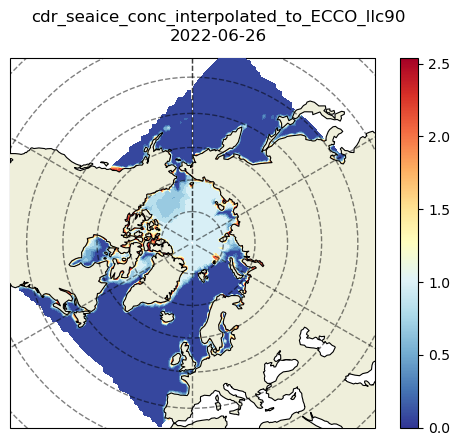

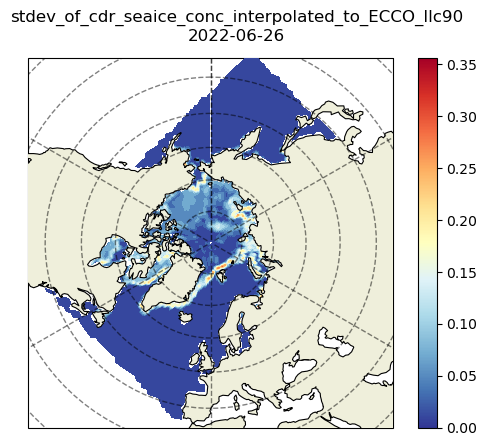

In [10]:
for field_ds in field_ds_list:
    plotting.make_plot(field_ds[0][list(field_ds[0].data_vars)[0]], 'nh')
